#install and import required packages

In [36]:
pip install hazm

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import hazm

from hazm import WordTokenizer
#pip show hazm
#Version: 0.9.3

#import data directly from kaggle

In [38]:
# Make sure the kaggle.json is present.
!ls -lha kaggle.json

# Install the Kaggle API client.
!pip install -q kaggle

# The Kaggle API client expects this file to be in ~/.kaggle.
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# This permissions change avoids a warning on Kaggle tool startup.
!chmod 600 ~/.kaggle/kaggle.json

# Replace with your dataset's API command
!kaggle datasets download -d soheiltehranipour/snappfood-persian-sentiment-analysis


-rw-r--r-- 1 root root 67 Sep 12 16:54 kaggle.json
snappfood-persian-sentiment-analysis.zip: Skipping, found more recently modified local copy (use --force to force download)


In [39]:
!unzip snappfood-persian-sentiment-analysis.zip

Archive:  snappfood-persian-sentiment-analysis.zip
replace Snappfood - Sentiment Analysis.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: Snappfood - Sentiment Analysis.csv  


#read and manipulate data



In [40]:
df = pd.read_csv('Snappfood - Sentiment Analysis.csv', delimiter='\t')
print('shape of dataset: ', df.shape, '\n', '-------------')
print(df.info())

shape of dataset:  (70000, 4) 
 -------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  520 non-null    object 
 1   comment     70000 non-null  object 
 2   label       70000 non-null  object 
 3   label_id    69480 non-null  float64
dtypes: float64(1), object(3)
memory usage: 2.1+ MB
None


In [41]:
df.sample(5)

,Unnamed: 0,comment,label,label_id
3385,NaN,غذا خوب بود استپ فود هم به موقع رسید,HAPPY,0.0
66935,NaN,سلام و خسته نباشید سفارشم تقریبا سرد شده بود ک...,SAD,1.0
68578,NaN,اینسری کیک اصلا تازه نبود,SAD,1.0
9422,NaN,به جای چیکن‌ برگر، همبرگر فرستادند که توی این ...,SAD,1.0
29041,NaN,پیک اصلا خبر نداد غذا رو میسپاره به نگهبانی من...,SAD,1.0


In [42]:
df.drop(df.columns[0], axis=1, inplace=True)
df.sample(5)

,comment,label,label_id
43999,غذا خیلی سرد بود، نوشابه و سس رو هم نفرستاده ب...,SAD,1.0
53053,خوش مزه و سبک، ممنون از رگا.,HAPPY,0.0
16007,عاااالی بود دااااغ و خوشمزه با نون و لیمو ممنو...,HAPPY,0.0
50475,نمیدونم کیفیت گوشتی که استفاده میکنید پایین ه ...,SAD,1.0
35741,آب انبه عالی و همچنین ویتامینه هم عالی بود فقط...,HAPPY,0.0


In [43]:
df.isnull().sum()

comment       0
label         0
label_id    520
dtype: int64

In [44]:
df[df['label_id'].isnull()].head(5)

,comment,label,label_id
21,SAD,1,NaN
89,SAD,1,NaN
161,SAD,1,NaN
180,SAD,1,NaN
243,HAPPY,0,NaN


In [45]:
df.dropna(axis=0, inplace=True)
df.isnull().sum()

comment     0
label       0
label_id    0
dtype: int64

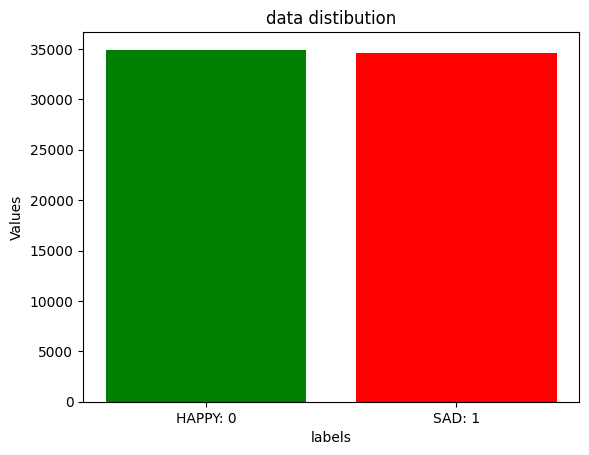

In [46]:
count_label = list(df['label_id'].value_counts())

colors = ['green', 'red']
plt.bar([0, 1], count_label, color= colors)

# Customize the tick markers or labels on the horizontal axis
new_labels = ['HAPPY: 0', 'SAD: 1']
plt.xticks([0, 1], new_labels)

# Add labels and title to the plot
plt.xlabel('labels')
plt.ylabel('Values')
plt.title('data distibution')

plt.show()


In [50]:
df['words_count'] = df['comment'].apply(lambda t: len(hazm.word_tokenize(t)))

min_max_len = df['words_count'].min() , df['words_count'].max()
print(f'Text Min: {min_max_len[0]} \tMax: {min_max_len[1]}')

Text Min: 2 	Max: 378
